In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')




In [34]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv',index_col=0,low_memory=False)

In [35]:
# Quickly check to see the size of our DF, both rows and columns
df.sort_index('index')

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [36]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [37]:
# your code here
# State codes are 9, 34, 36
tristates = [9, 34, 36]
df = df[df['_STATE'].isin(tristates)]

Now check to see how large our subset df.

In [38]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [39]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [40]:
#your code here
# need to use np.where

zero_dict = {88:0,
            77:np.nan,
            99:np.nan}
df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [41]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

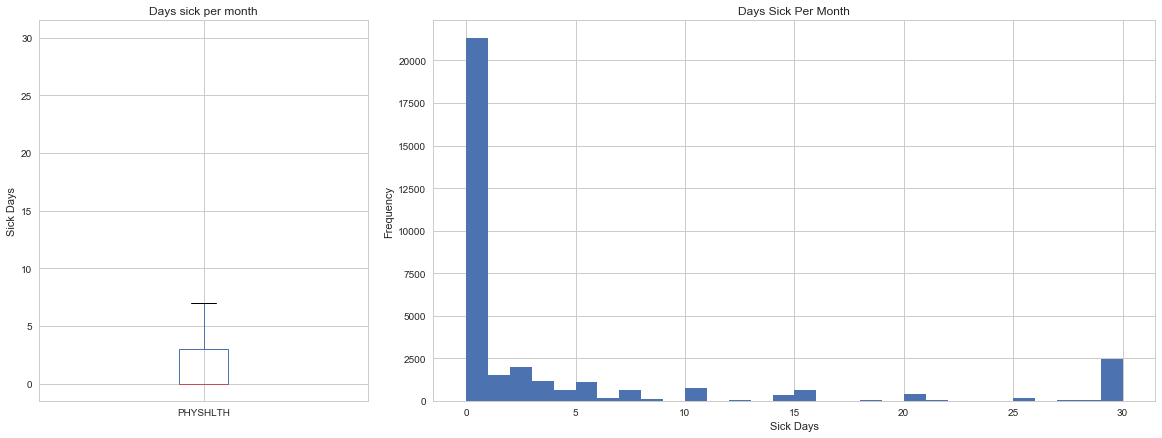

In [73]:
# graphic showing those descriptive stat
desc_grid = (1,3)
desc_fig = plt.figure(figsize=(20,7))
desc_ax1 = plt.subplot2grid(desc_grid, (0, 0),colspan=1)
desc_ax2 = plt.subplot2grid(desc_grid, (0, 1), colspan=2)

df['PHYSHLTH'].plot(kind = 'box', title = 'Days sick per month',ax=desc_ax1);
desc_ax1.set_ylabel('Sick Days');
df['PHYSHLTH'].plot(kind = 'hist', bins = 30, title = 'Days Sick Per Month', ax=desc_ax2);
desc_ax2.set_xlabel('Sick Days');

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [43]:
df['STATE'] = df['_STATE'].replace({9:'CT', 34:'NJ', 36:'NY'})
df.groupby('STATE')['PHYSHLTH'].mean()

STATE
CT    3.688562
NJ    4.380957
NY    4.148030
Name: PHYSHLTH, dtype: float64

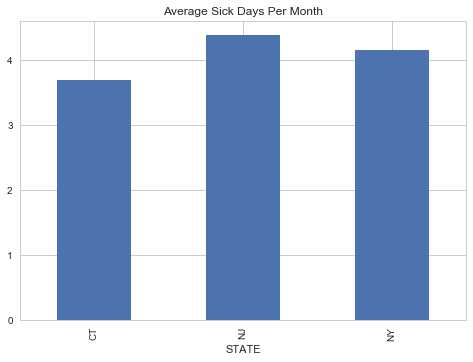

In [44]:
df.groupby('STATE')['PHYSHLTH'].mean().plot(kind = 'bar',title='Average Sick Days Per Month');

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [45]:
# code to create new colum for chronically sick
# we define what is "chronically sick" - anything above box plot (top whisker is 1.5 IQR + end of box)
outlier_cutoff = (df['PHYSHLTH'].quantile(.75) - df['PHYSHLTH'].quantile(.25)) * 1.5 + df['PHYSHLTH'].quantile(.75)
outlier_cutoff

df['SICK'] = df['PHYSHLTH'] > outlier_cutoff

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [46]:
# code to calculate averages per state
df.groupby(['STATE','SICK'])['_STATE'].count().unstack().apply(lambda row: row/row.sum(),axis ='columns')


SICK,False,True
STATE,,
CT,0.863903,0.136097
NJ,0.838145,0.161855
NY,0.848559,0.151441


In [47]:
freq_table = pd.crosstab(df['STATE'],df['SICK'],normalize ='index')

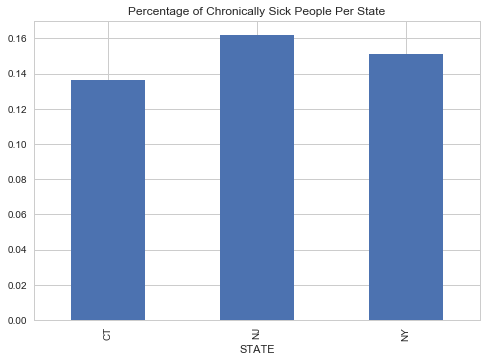

In [48]:
# create graphic to compare chronically sick by state
freq_table.drop(columns = False).plot(kind = 'bar',title = 'Percentage of Chronically Sick People Per State', legend = False);

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [76]:
df['smoking'] = np.where(df['SMOKE100'] == 2, 3 ,df['SMOKDAY2'])
#this above takes values where smoke100 = 2, assigns it to 'non smoker' or just takes in the value from SMOKDAY2

In [49]:
df['SMOKDAY2'].value_counts(dropna = False) #shows NaNs
df['SMOKDAY2'] = df['SMOKDAY2'].replace({7:np.nan, 9: np.nan, 1: 'Every Day', 2: 'Some Days', 3: 'No Days'})
df['SMOKDAY2'].describe()

count       13750
unique          3
top       No Days
freq         9703
Name: SMOKDAY2, dtype: object

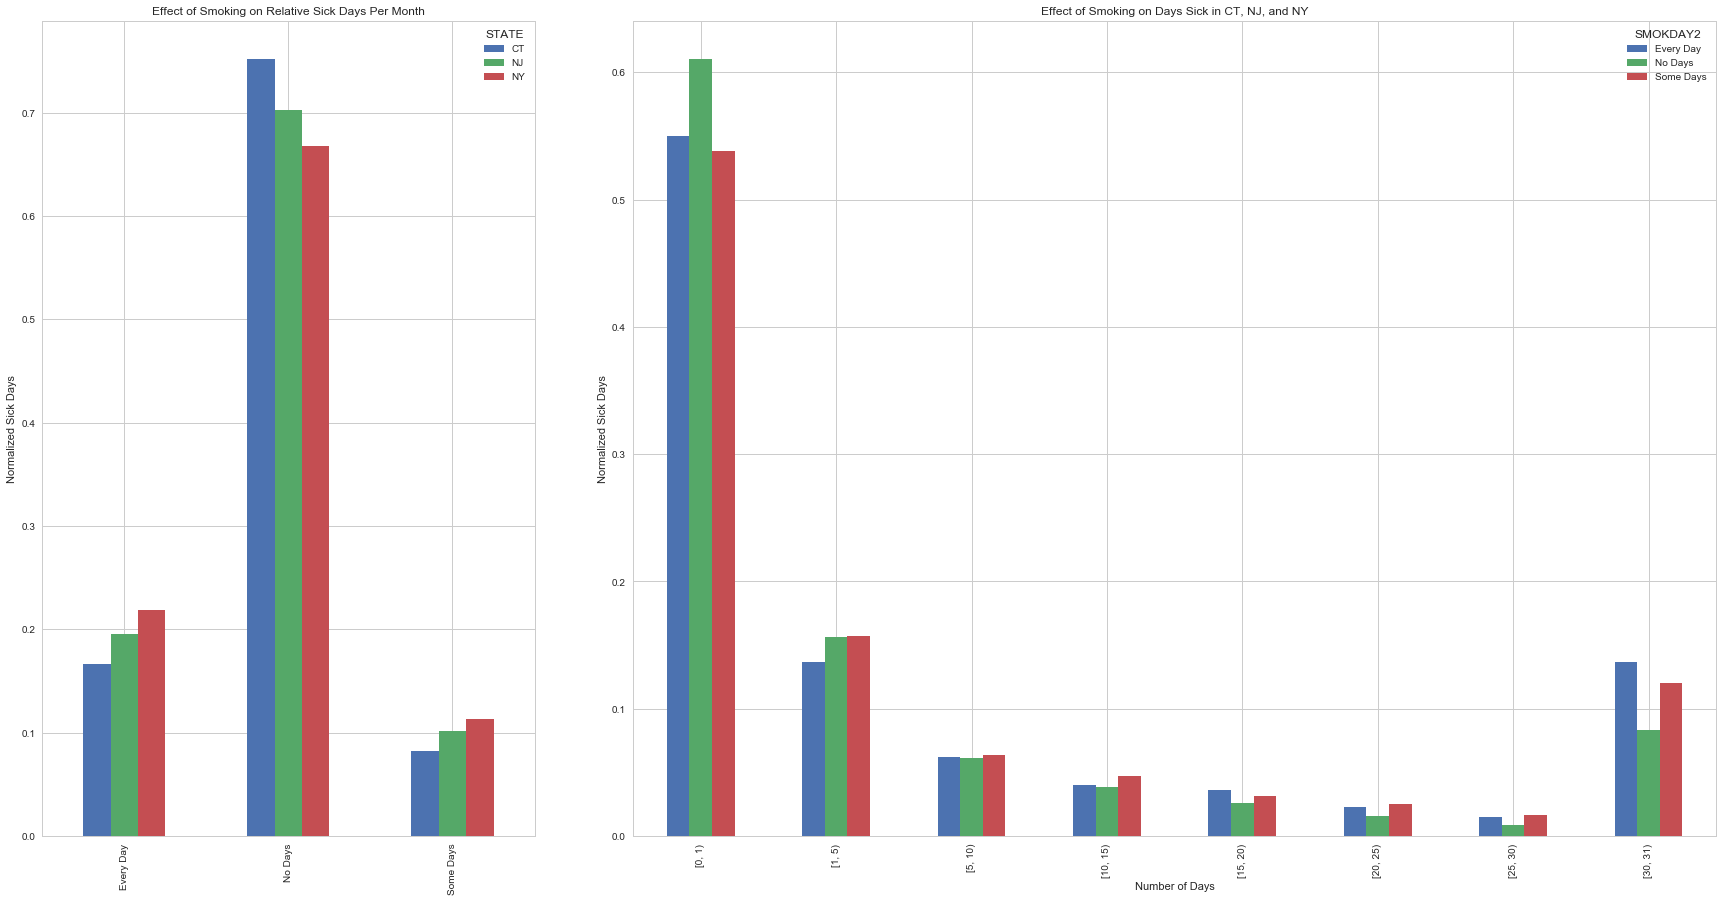

In [74]:
smok_grid = (1,3)
smok_fig = plt.figure(figsize=(30,15))
smok_ax1 = plt.subplot2grid(smok_grid, (0, 0),colspan=1)
smok_ax2 = plt.subplot2grid(smok_grid, (0, 1), colspan=2)

pd.crosstab(df['SMOKDAY2'],
            df['STATE'], normalize = 'columns').plot(kind = 'bar',
                                                    title = 'Effect of Smoking on Relative Sick Days Per Month',
                                                    ax = smok_ax1);
smok_ax1.set_ylabel('Normalized Sick Days'), smok_ax1.set_xlabel(''); 
pd.crosstab(df['PHYSHLTH'],df['SMOKDAY2']);
graph_bins = pd.cut(df['PHYSHLTH'],[0,1,5,10,15,20,25,30,31],right = False)
pd.crosstab(graph_bins, 
            df['SMOKDAY2'],
            normalize='columns').plot(kind = 'bar', 
                                      title= 'Effect of Smoking on Days Sick in CT, NJ, and NY',
                                      ax = smok_ax2);
smok_ax2.set_ylabel('Normalized Sick Days'), smok_ax2.set_xlabel('Number of Days');



## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [51]:
def clean_alcday5(response):
    if np.isnan(response):
        return np.nan
    elif response < 100:
        return response
    elif 100 < response < 200:
        return (response - 100)/ 7 * 30
    elif 200 < response < 231:
        return response - 200
    elif response == 888:
        return 0
    else: 
        return np.nan

df['ALCDAY5']= df['ALCDAY5'].map(clean_alcday5)

In [52]:
corr_data = pd.DataFrame(df['ALCDAY5'],df['PHYSHLTH']).reset_index()
corr_data.corr('pearson')

,PHYSHLTH,ALCDAY5
PHYSHLTH,1.0,NaN
ALCDAY5,NaN,NaN


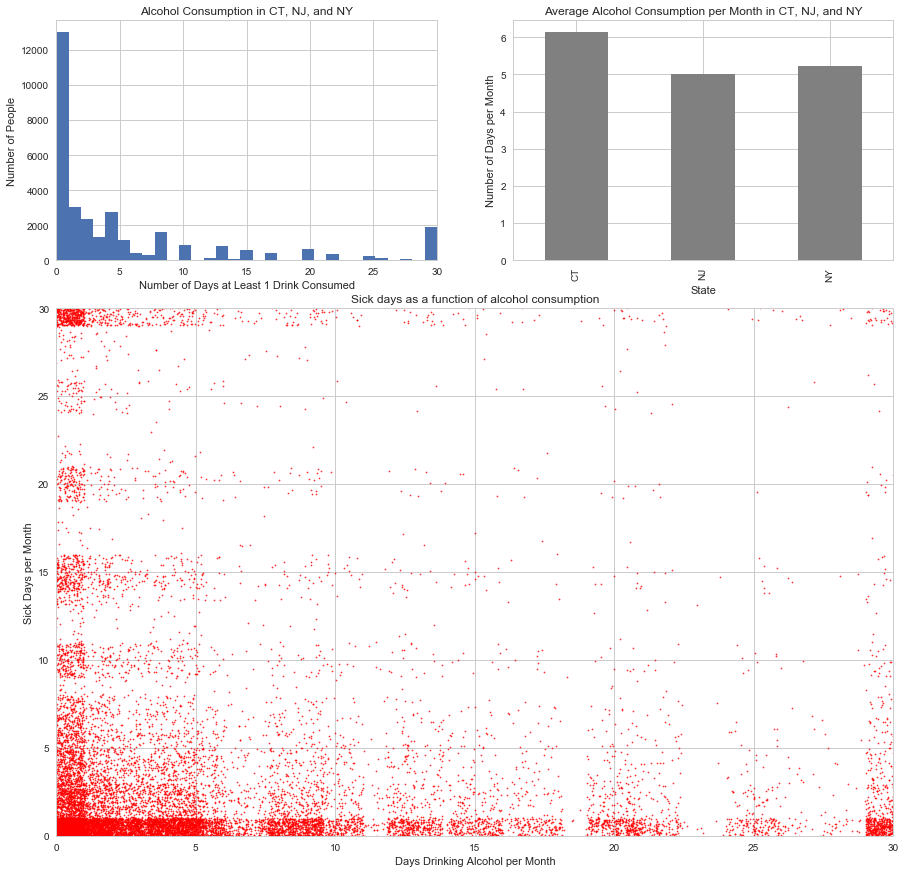

In [84]:
gridsize = (3, 2)
alc_fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2)

df['ALCDAY5'].plot(kind = 'hist', 
                   bins = 31, 
                   title = 'Alcohol Consumption in CT, NJ, and NY',
                   ax=ax1);
ax1.set_xlabel('Number of Days at Least 1 Drink Consumed'), ax1.set_ylabel('Number of People')
ax1.set_xlim(left = 0, right = 30)

df.groupby('STATE')['ALCDAY5'].mean().plot(kind = 'bar', 
                                           title='Average Alcohol Consumption per Month in CT, NJ, and NY',
                                           ax=ax2,
                                          color='gray');
ax2.set_ylabel('Number of Days per Month'); ax2.set_xlabel('State')

sns.regplot(x=df['ALCDAY5'], 
            y=df['PHYSHLTH'],
            fit_reg=False,
            ax=ax3,
            x_jitter=1,
            y_jitter=1,
            scatter_kws={"s": 3},color='red')
ax3.set_xlabel('Days Drinking Alcohol per Month')
ax3.set_ylabel('Sick Days per Month')
ax3.set_title('Sick days as a function of alcohol consumption');
ax3.set_xlim(left = 0, right = 30), ax3.set_ylim(bottom=0, top=30);
alc_fig.savefig('Alcohol_consumption.png')

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  